In [2]:
# Import Libraries

import pandas as pd

import numpy as np

import random

from datetime import datetime

import matplotlib.pyplot as plt


 

## Set max row display, Lets me see if all the data is in the right order if needed, normally set to 10

pd.set_option('display.max_rows', 100)

 

# Get rid of the warnings (there are a lot of them) and let me see all the rows of data)

import warnings

warnings.filterwarnings("ignore")

In [3]:
#Creates a database of the teams and their data
def read_files(xls,Team1_days,Team2_days):
    team1=pd.DataFrame()
    team2=pd.DataFrame()
    
    for day in Team1_days:
        team1=pd.concat([team1,pd.read_excel(xls,day)],ignore_index=True)
    for day in Team2_days:
        team1=pd.concat([team1,pd.read_excel(xls,day)],ignore_index=True)
        
    
   

    # Concat the logs together

    database = pd.concat([team1, team2], ignore_index=True)
    return database

In [4]:
# Get Course information
def par_data(TP,course_name):
    
    par_df = TP[['Tournament', 'Round', 'Hole', 'Par']]
    #print(par_df.empty)
    #print(par_df)

    par_df = par_df.loc[par_df['Round'] == "Rd 1"]
    #print(par_df)

    par_df = par_df.loc[par_df['Tournament'] == course_name]
    #print(par_df)
    

    par_df.drop(par_df.loc[par_df['Hole']=='RD'].index, inplace=True)

    par_df.drop(par_df.loc[par_df['Hole']=='OUT'].index, inplace=True)

    par_df.drop(par_df.loc[par_df['Hole']=='IN'].index, inplace=True)
    return par_df

In [71]:
##SIMULATE A LIST OF PLAYERS
def simulate(player_1_name,course_name,num_of_sims,xls,TP,database,par_df):
    print(player_1_name)
    print('--------------------------------')
    if player_1_name not in database['Player'].values:
        print(f"No data available for {player_1_name}. Simulation cannot proceed.")
        return pd.DataFrame(), 0
    CR = pd.read_excel(xls, 'Tournament Info')

    CR = CR[['Tournament', 'Rating', 'Slope']]
    

    par_lst = par_df['Par'].tolist()
    
    database_add = database.merge(TP, left_on=['Tournament', 'Round', 'Hole'],

                                      right_on=['Tournament', 'Round', 'Hole'])

   

    database_add = database_add.merge(CR, left_on='Tournament',

                                        right_on='Tournament')
    database_add.drop(database_add.loc[database_add['Hole']=='RD'].index, inplace=True)
    

    database_add.drop(database_add.loc[database_add['Hole']=='OUT'].index, inplace=True)

    database_add.drop(database_add.loc[database_add['Hole']=='IN'].index, inplace=True)
    #print(database_add)


    # Assuming database_add is your DataFrame and 'Hole' is a column in it
    # Example setup
    # database_add = pd.DataFrame({'Hole': ['Hole 1', 'Hole 2', ..., 'Hole 18']})

    # Define conditions
    conditions = [
        database_add['Hole'].isin(['Hole 1', 'Hole 2', 'Hole 3', 'Hole 4', 'Hole 5', 'Hole 6', 'Hole 7', 'Hole 8', 'Hole 9']),
        database_add['Hole'].isin(['Hole 10', 'Hole 11', 'Hole 12', 'Hole 13', 'Hole 14', 'Hole 15', 'Hole 16', 'Hole 17', 'Hole 18'])
    ]

    # Define choices
    choices = ['Front 9', 'Back 9']

    # Apply np.select
    database_add['Side'] = np.select(conditions, choices, default='Unknown')

    # Now 'Side' column will have 'Front 9' for holes 1-9 and 'Back 9' for holes 10-18
    
    par_3_df = database_add.loc[database_add['Par'] == 3]

 

    # Create an index of the holes for when the data needs to be merged back

    par_3_df = par_3_df.reset_index()

    par_3_df['index1'] = par_3_df.index

    par_3_df = par_3_df.rename(columns={"index1": "Hole #"})

 

# Vecorized version using np.select to add Score column

    conditions = [
        par_3_df['Score'] == 1,
        par_3_df['Score'] == 2,
        par_3_df['Score'] == 3,
        par_3_df['Score'] == 4,
        par_3_df['Score'] == 5,
        par_3_df['Score'] == 6,
        par_3_df['Score'] >=7
    ]

    choices = [
        'hole_in_one',
        'Birdie',
        'Par',
        'Bogey',
        'Double_Bogey',
        'Triple_Bogey',
        'Quad_Bogey_+'
    ]

    par_3_df['Score_Name'] = np.select(conditions, choices, default='other')


    par_3_df = par_3_df.drop(["Hole #"], axis=1)

       

########################################################

 

    # Create Dataset of only Par 4's

    par_4_df = database_add.loc[database_add['Par'] == 4]

 

    # Create an index of the holes for when the data needs to be merged back

    par_4_df = par_4_df.reset_index()

    par_4_df['index1'] = par_4_df.index

    par_4_df = par_4_df.rename(columns={"index1": "Hole #"})


    conditions = [
        par_4_df['Score'] == 1,
        par_4_df['Score'] == 2,
        par_4_df['Score'] == 3,
        par_4_df['Score'] == 4,
        par_4_df['Score'] == 5,
        par_4_df['Score'] == 6,
        par_4_df['Score'] ==7,
        par_4_df['Score'] >=8
    ]

    choices = [
        'hole_in_one',
        'Eagle',
        'Birdie',
        'Par',
        'Bogey',
        'Double_Bogey',
        'Triple_Bogey',
        'Quad_Bogey_+'
    ]

    par_4_df['Score_Name'] = np.select(conditions, choices, default='other')

    par_4_df = par_4_df.drop(["Hole #"], axis=1)

   

########################################################

 

    # Create Dataset of only Par 5's

    par_5_df = database_add.loc[database_add['Par'] == 5]

 

    # Create an index of the holes for when the data needs to be merged back

    par_5_df = par_5_df.reset_index()

    par_5_df['index1'] = par_5_df.index

    par_5_df = par_5_df.rename(columns={"index1": "Hole #"})

 


    conditions = [
        par_5_df['Score'] == 1,
        par_5_df['Score'] == 2,
        par_5_df['Score'] == 3,
        par_5_df['Score'] == 4,
        par_5_df['Score'] == 5,
        par_5_df['Score'] == 6,
        par_5_df['Score'] ==7,
        par_5_df['Score'] ==8,
        par_5_df['Score'] >=9
    ]

    choices = [
        'hole_in_one',
        'Double_Eagle',
        'Eagle',
        'Birdie',
        'Par',
        'Bogey',
        'Double_Bogey',
        'Triple_Bogey',
        'Quad_Bogey_+'
    ]

    par_5_df['Score_Name'] = np.select(conditions, choices, default='other')

    par_5_df = par_5_df.drop(["Hole #"], axis=1)

       

########################################################

 

    # Merge the Datasets Together

    database_add = pd.concat([par_3_df, par_4_df], ignore_index=True)

    database_add = pd.concat([database_add, par_5_df], ignore_index=True)

    database_add['Count'] = 1

 

    # Remove the extremes

    database_add.drop(database_add.loc[database_add['Score_Name']== "hole_in_one"].index, inplace=True)

    database_add.drop(database_add.loc[database_add['Score_Name']== "Double_Eagle"].index, inplace=True)   

    database_add.drop(database_add.loc[database_add['Score_Name']== "Quad_Bogey_+"].index, inplace=True)
    #print(database_add)
   

########################################################

 

    # Create adusted score

    database_add['adj_score'] = database_add['Score']
    #print(database_add)

    Cleaned_Dataset = database_add
    
    player_1_df = Cleaned_Dataset.loc[Cleaned_Dataset['Player'] == player_1_name]

 

    # Clean the dataframe

    player_1_df = player_1_df.reset_index()

    player_1_df['Count'] = 1

 

    # Create list of outcomes grouped by scores

    player_1_count = player_1_df.groupby(["Player", "Side", "Score_Name", "Par", "adj_score"])["Count"].count().reset_index()

 

    # Create list of outcomes but not grouped by scores

    player_1_total = player_1_df.groupby(["Player", "Side", "Par"])["Count"].count().reset_index()

 

    # Merge the two datasets

    player_1_overview = player_1_count.merge(player_1_total, left_on=["Side", "Par"]

                                             , right_on=["Side", "Par"])

 

    # Create a rate column

    player_1_overview['Rate'] = player_1_overview['Count_x'] / player_1_overview['Count_y']

 

    # Clean the data

    player_1_overview = player_1_overview.rename(columns={"Count_x": "# of Outcome",

                                                          "Count_y": "# of Times",

                                                          "Player_x" : "Player"})

    player_1_overview = player_1_overview.drop(["Player_y"], axis=1)

 

    # Create the base dataframe that the hole data will be appended too

    player_1_sim_df = pd.DataFrame(index=np.arange(num_of_sims), columns=np.arange(1))

    player_1_sim_df['index1'] = player_1_sim_df.index

    player_1_sim_df = player_1_sim_df.drop([0], axis=1)

    player_1_sim_df = player_1_sim_df.rename(columns={"index1": "Sim #"})

    player_1_sim_df['Player 1'] = player_1_name

 

    # Create the loop for player 1


    # Assuming player_1_overview, num_of_sims, and player_1_name are predefined
    # Initialize the main simulation DataFrame if not already done
    player_1_sim_df = pd.DataFrame({'Sim #': range(num_of_sims)})

    for counter, par in enumerate(par_lst, start=1):
        # Determine side based on the counter
        side = 'Front 9' if counter <= 9 else 'Back 9'

        # Filter player_1 data for current side and par
        player_1 = player_1_overview.loc[(player_1_overview['Side'] == side) & (player_1_overview['Par'] == par)]

        # Create new input data
        new_data = {
            'Player': [player_1_name, player_1_name],
            'Side': [side, side],
            'Score_Name': ['Hole_in_one', 'Quad_Bogey_+'],
            'Par': [par, par],
            'adj_score': [1, par + 4],
            '# of Outcome': [0, 0],
            '# of Times': [0, 0],
            'Rate': [0.00011, 0.005]
        }
        df1 = pd.DataFrame(new_data)

        # Concatenate new input data with filtered data
        num_of_types = player_1['adj_score'].count()
        drop_rate = 0.00511 / num_of_types
        player_1['Rate'] -= drop_rate
        player_1 = pd.concat([player_1, df1], ignore_index=True)

        # Generate input weights for the random choice generator
        player_1_score = player_1['adj_score'].tolist()
        player_1_weight = player_1['Rate'].tolist()

        # Create the simulations
        player_1_lst = random.choices(player_1_score, player_1_weight, k=num_of_sims)
        player_1_df = pd.DataFrame(player_1_lst, columns=["Hole"+str(counter)])
        player_1_df['Sim #'] = player_1_df.index

        # Merge each hole to the main datasets
        player_1_sim_df = player_1_sim_df.merge(player_1_df, on="Sim #")

    # Now player_1_sim_df contains all the simulation results

            
    front_9_holes = ['Hole' + str(i) for i in range(1, 10)]
    back_9_holes = ['Hole' + str(i) for i in range(10, 19)]

    player_1_sim_df['Front_9'] = player_1_sim_df[front_9_holes].sum(axis=1)
    player_1_sim_df['Back_9'] = player_1_sim_df[back_9_holes].sum(axis=1)
    player_1_sim_df['Overall'] = player_1_sim_df['Front_9'] + player_1_sim_df['Back_9']
    
    #print(player_1_sim_df)
    
#     cols_to_keep = ['Sim #', 'Course','Player 1', "Player (#)"]

#     # Initialize an empty list to store the individual hole DataFrames
#     holes_dfs = []

#     # Loop through hole numbers (assuming they are named "Hole1", "Hole2", ..., "Hole18" in the original DataFrame)
#     for i in range(1, 19):
#         # Create a new DataFrame for the current hole
#         hole_df = player_1_sim_df[cols_to_keep].copy()

#         # Set the hole number
#         hole_df['Hole'] = f"Hole {i}"

#         # Set the score from the corresponding column in the original DataFrame
#         hole_df['Score'] = player_1_sim_df[f'Hole{i}']

#         # Append the DataFrame for the current hole to the list
#         holes_dfs.append(hole_df)

#     # Concatenate all the hole DataFrames into one final cleaned DataFrame
#     Player_1_df_final_cleaned = pd.concat(holes_dfs, ignore_index=True)

#     # Rename the 'Player 1' column to 'Player (Name)'
#     Player_1_df_final_cleaned = Player_1_df_final_cleaned.rename(columns={"Player 1": "Player (Name)"})
#     grouped_outcome = player_1_sim_df.groupby(['Hole1','Hole2','Hole3','Hole4','Hole5','Hole6','Hole7','Hole8','Hole9','Hole10','Hole11','Hole12','Hole13','Hole14','Hole15','Hole16','Hole17','Hole18','Front_9','Back_9','Overall']).size().reset_index(name='Count')
    player_1_sim_df[player_1_name]=player_1_name
    player_1_sim_df['Course']=course_name
    melted_df = pd.melt(player_1_sim_df, id_vars=['Sim #', player_1_name, 'Course'], var_name='Hole', value_name='Score')
   
    # Assuming 'melted_df' is your DataFrame
    melted_df = melted_df[~melted_df['Hole'].isin(['Front_9', 'Back_9',"Overall"])]


    # Extract hole numbers from the 'Hole' column and create a new 'Hole #' column
    melted_df['Hole #'] = melted_df['Hole'].str.extract('(\d+)')
    melted_df.dropna(subset=['Hole #'], inplace=True)  # Drop rows where 'Hole #' is NaN
    melted_df['Hole #'] = melted_df['Hole #'].astype(int)  # Now safe to convert to int

    # Now, melted_df has columns 'Sim #', 'Player Name', 'Course', 'Hole', 'Score', 'Hole #'
    # Where 'Hole #' is the numerical identifier for each hole
    
    player_1_sim_df=melted_df
    player_1_sim_df.rename(columns={"Score":player_1_name+" score"},inplace=True)
    #print(player_1_sim_df)
    return player_1_sim_df,1
    


    



In [77]:
##RUN INDIVIDUAL SIMULATIONS
start_time = datetime.now()
# team_1_name = 'Auburn'

# team_2_name = 'Mizzou'

course_input = 'Legends Trail Golf Club'

# team1_days=['Alabama (9.26.23)','Alabama (10.3.23)','Alabama (10.29.23)','Alabama (2.21.24)','Alabama (3.19.24)']
# team2_days=['Alabama (9.17.23)']

sims_input = 100000
print('Writing into file')
# Open the excel file

xls_file = pd.ExcelFile('C:/Users/vvikranth/OneDrive - The University of Alabama Athletics/Desktop/Mens Golf Datebase.xlsx')

days_played = xls_file.sheet_names  # see all sheet names
for i in range(3):
    days_played.pop()
print(days_played)

teams_database = pd.concat([xls_file.parse(days) for days in days_played])
#print(teams_database)
players = pd.read_excel(xls_file, 'Players')

TP_file = pd.read_excel(r'\\ia.ua.edu\department\Strategic Planning\Interns\1. Current Interns\Vishak\Golf\Golf Data\Tournament Par final.xlsx')
#print(players)
# teams_database=read_files(xls_file,team1_days,team2_days)
par_info=par_data(TP_file,course_input)
player_list=players["Player"]
print(player_list)

#excel_path = r'\\ia.ua.edu\department\Strategic Planning\Interns\1. Current Interns\Vishak\Golf\Golf Data\Alabama_golf_player_simulation.xlsx'
csv_path=r'\\ia.ua.edu\department\Strategic Planning\Interns\1. Current Interns\Vishak\Golf\Golf Data\SEC_golf_player_simulation.csv'


final_df,exist=simulate(player_list[0], course_name = course_input, num_of_sims = sims_input,xls=xls_file,TP=TP_file,database=teams_database,par_df=par_info)
print(exist)
if exist==1:
    print(final_df.columns.tolist())
    final_df.drop(["Hole"],axis=1,inplace=True)
    final_df.drop([player_list[0]],axis=1,inplace=True)
    final_df=final_df[["Sim #","Course","Hole #",player_list[0]+" score"]]
#rint(final_df)
player_df=pd.DataFrame()


    
#rint(final_df)
for player in player_list[1:]:

    player_df,exist=simulate(player, course_name = course_input, num_of_sims = sims_input,xls=xls_file,TP=TP_file,database=teams_database,par_df=par_info)
    if exist==1:
        player_df.drop(["Sim #","Course","Hole","Hole #",player],axis=1,inplace=True)
        final_df=pd.concat([final_df,player_df],axis=1)

# print(len(final_df.columns.tolist()))
final_df.to_csv(csv_path,index=True)
    


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Writing into file
['Alabama (9.17.23)', 'Alabama (9.26.23)', 'Alabama (10.3.23)', 'Alabama (10.29.23)', 'Alabama (2.21.24)', 'Alabama (3.19.24)', 'Florida (9.17.23)', 'Florida (10.16.23)', 'Florida (11.1.23)', 'Florida (10.10.23)', 'Florida (9.26.23)', 'Mizzou (9.26.23)', 'Mizzou (9.19.23)', 'Mizzou (10.10.23)', 'Mizzou (10.08.23)', 'Mizzou (09.05.23)', 'Auburn (9.9.2023)', 'Auburn (10.8.23)', 'Auburn (10.17.23)', 'Auburn (9.26.23)', 'Auburn (10.10.23)', 'Vanderbilt (10.25.23)', 'Vanderbilt (10.3.23)', 'Vanderbilt (9.26.23)', 'Vanderbilt (9.11.23)', 'LSU (10.17.23)', 'LSU (10.10.23)', 'LSU (9.26.23)', 'LSU (9.11.23)', 'LSU (9.5.23)', 'Arkansas (9.6.23)', 'Arkansas (10.4.23)', 'Arkansas (9.26.23)', 'Arkansas (10.10.23)', 'Ole Miss (10.17.23)', 'Ole Miss (9.26.23)', 'Ole Miss (9.10.23)', 'Tennessee (9.10.23)', 'Tennessee (9.26.23)', 'Tennessee (10.15.23)', 'Tennessee (10.2.23)', 'Texas A&M (9.26.23)', 'Texas A&M (10.3.23)', 'Texas A&M (10.15.23)', 'Texas A&M (10.23.23)', 'Texas A&M (9.5.

In [23]:
##SIMULATE TEAM MATCHUPS

def golf_simulator(player_1_name, player_2_name, course_name, num_of_sims,xls,TP,database,par_df):

   

    print(f'{player_1_name} vs {player_2_name}')

    print('----------------------------------')

   
    # GET THE Course Rating

    CR = pd.read_excel(xls, 'Tournament Info')

    CR = CR[['Tournament', 'Rating', 'Slope']]

    if player_1_name not in database['Player'].values:
        print(f"No data available for {player_1_name}. Simulation cannot proceed.")
        return pd.DataFrame()

    if player_2_name not in database['Player'].values:
        print(f"No data available for {player_2_name}. Simulation cannot proceed.")
        return pd.DataFrame()

########################################################

   





    #par_df = par_df.drop(["Tournament"], axis=1)

    #par_df = par_df.drop(["Round"], axis=1)
    

   # print(par_df)

########################################################

 

    #### Create Hole Variables

    hole_lst_test = par_df['Par'].tolist()



    # Hole lst

    hole_1 = hole_lst_test[0]

    hole_2 = hole_lst_test[1]

    hole_3 = hole_lst_test[2]

    hole_4 = hole_lst_test[3]

    hole_5 = hole_lst_test[4]

    hole_6 = hole_lst_test[5]

    hole_7 = hole_lst_test[6]

    hole_8 = hole_lst_test[7]

    hole_9 = hole_lst_test[8]

   

    hole_10 = hole_lst_test[9]

    hole_11 = hole_lst_test[10]

    hole_12 = hole_lst_test[11]

    hole_13 = hole_lst_test[12]

    hole_14 = hole_lst_test[13]

    hole_15 = hole_lst_test[14]

    hole_16 = hole_lst_test[15]

    hole_17 = hole_lst_test[16]

    hole_18 = hole_lst_test[17]

 

########################################################

 

    par_lst = [hole_1, hole_2, hole_3,

               hole_4, hole_5, hole_6,

               hole_7, hole_8, hole_9,

               hole_10, hole_11, hole_12,

               hole_13, hole_14, hole_15,

               hole_16, hole_17, hole_18]

 

########################################################

    #### Merge the data sets and clean

    # Merge the datasets

    database_add = database.merge(TP, left_on=['Tournament', 'Round', 'Hole'],

                                      right_on=['Tournament', 'Round', 'Hole'])

   

    database_add = database_add.merge(CR, left_on='Tournament',

                                        right_on='Tournament')

 

    # Remove added info-

    database_add.drop(database_add.loc[database_add['Hole']=='RD'].index, inplace=True)
    

    database_add.drop(database_add.loc[database_add['Hole']=='OUT'].index, inplace=True)

    database_add.drop(database_add.loc[database_add['Hole']=='IN'].index, inplace=True)
    #print(database_add)
 

 

 

   # database_add = database_add.drop(["Men's HCP", "Team", "Tournament"], axis=1)

 

    # Add a column to show what hole we are on

    database_add['Side'] = database_add['Hole']

    database_add['Side']  = database_add['Side'] .replace("Hole 1", "Front 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 2", "Front 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 3", "Front 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 4", "Front 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 5", "Front 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 6", "Front 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 7", "Front 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 8", "Front 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 9", "Front 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 10", "Back 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 11", "Back 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 12", "Back 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 13", "Back 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 14", "Back 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 15", "Back 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 16", "Back 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 17", "Back 9")

    database_add['Side']  = database_add['Side'] .replace("Hole 18", "Back 9")

   

########################################################

 

    # Create Dataset of only Par 3's

    par_3_df = database_add.loc[database_add['Par'] == 3]

 

    # Create an index of the holes for when the data needs to be merged back

    par_3_df = par_3_df.reset_index()

    par_3_df['index1'] = par_3_df.index

    par_3_df = par_3_df.rename(columns={"index1": "Hole #"})

 

# Vecorized version using np.select to add Score column

    conditions = [
        par_3_df['Score'] == 1,
        par_3_df['Score'] == 2,
        par_3_df['Score'] == 3,
        par_3_df['Score'] == 4,
        par_3_df['Score'] == 5,
        par_3_df['Score'] == 6,
        par_3_df['Score'] >=7
    ]

    choices = [
        'hole_in_one',
        'Birdie',
        'Par',
        'Bogey',
        'Double_Bogey',
        'Triple_Bogey',
        'Quad_Bogey_+'
    ]

    par_3_df['Score_Name'] = np.select(conditions, choices, default='other')


    par_3_df = par_3_df.drop(["Hole #"], axis=1)

       

########################################################

 

    # Create Dataset of only Par 4's

    par_4_df = database_add.loc[database_add['Par'] == 4]

 

    # Create an index of the holes for when the data needs to be merged back

    par_4_df = par_4_df.reset_index()

    par_4_df['index1'] = par_4_df.index

    par_4_df = par_4_df.rename(columns={"index1": "Hole #"})


    conditions = [
        par_4_df['Score'] == 1,
        par_4_df['Score'] == 2,
        par_4_df['Score'] == 3,
        par_4_df['Score'] == 4,
        par_4_df['Score'] == 5,
        par_4_df['Score'] == 6,
        par_4_df['Score'] ==7,
        par_4_df['Score'] >=8
    ]

    choices = [
        'hole_in_one',
        'Eagle',
        'Birdie',
        'Par',
        'Bogey',
        'Double_Bogey',
        'Triple_Bogey',
        'Quad_Bogey_+'
    ]

    par_4_df['Score_Name'] = np.select(conditions, choices, default='other')

    par_4_df = par_4_df.drop(["Hole #"], axis=1)

   

########################################################

 

    # Create Dataset of only Par 5's

    par_5_df = database_add.loc[database_add['Par'] == 5]

 

    # Create an index of the holes for when the data needs to be merged back

    par_5_df = par_5_df.reset_index()

    par_5_df['index1'] = par_5_df.index

    par_5_df = par_5_df.rename(columns={"index1": "Hole #"})

 


    conditions = [
        par_5_df['Score'] == 1,
        par_5_df['Score'] == 2,
        par_5_df['Score'] == 3,
        par_5_df['Score'] == 4,
        par_5_df['Score'] == 5,
        par_5_df['Score'] == 6,
        par_5_df['Score'] ==7,
        par_5_df['Score'] ==8,
        par_5_df['Score'] >=9
    ]

    choices = [
        'hole_in_one',
        'Double_Eagle',
        'Eagle',
        'Birdie',
        'Par',
        'Bogey',
        'Double_Bogey',
        'Triple_Bogey',
        'Quad_Bogey_+'
    ]

    par_5_df['Score_Name'] = np.select(conditions, choices, default='other')

    par_5_df = par_5_df.drop(["Hole #"], axis=1)

       

########################################################

 

    # Merge the Datasets Together

    database_add = pd.concat([par_3_df, par_4_df], ignore_index=True)

    database_add = pd.concat([database_add, par_5_df], ignore_index=True)

    database_add['Count'] = 1

 

    # Remove the extremes

    database_add.drop(database_add.loc[database_add['Score_Name']== "hole_in_one"].index, inplace=True)

    database_add.drop(database_add.loc[database_add['Score_Name']== "Double_Eagle"].index, inplace=True)   

    database_add.drop(database_add.loc[database_add['Score_Name']== "Quad_Bogey_+"].index, inplace=True)
    #print(database_add)
   

########################################################

 

    # Create adusted score

    database_add['adj_score'] = database_add['Score']
    #print(database_add)

    Cleaned_Dataset = database_add

    

########################################################

 

    # Select Player 1

    player_1_df = Cleaned_Dataset.loc[Cleaned_Dataset['Player'] == player_1_name]

 

    # Clean the dataframe

    player_1_df = player_1_df.reset_index()

    player_1_df['Count'] = 1

 

    # Create list of outcomes grouped by scores

    player_1_count = player_1_df.groupby(["Player", "Side", "Score_Name", "Par", "adj_score"])["Count"].count().reset_index()

 

    # Create list of outcomes but not grouped by scores

    player_1_total = player_1_df.groupby(["Player", "Side", "Par"])["Count"].count().reset_index()

 

    # Merge the two datasets

    player_1_overview = player_1_count.merge(player_1_total, left_on=["Side", "Par"]

                                             , right_on=["Side", "Par"])

 

    # Create a rate column

    player_1_overview['Rate'] = player_1_overview['Count_x'] / player_1_overview['Count_y']

 

    # Clean the data

    player_1_overview = player_1_overview.rename(columns={"Count_x": "# of Outcome",

                                                          "Count_y": "# of Times",

                                                          "Player_x" : "Player"})

    player_1_overview = player_1_overview.drop(["Player_y"], axis=1)

 

    # Create the base dataframe that the hole data will be appended too

    player_1_sim_df = pd.DataFrame(index=np.arange(num_of_sims), columns=np.arange(1))

    player_1_sim_df['index1'] = player_1_sim_df.index

    player_1_sim_df = player_1_sim_df.drop([0], axis=1)

    player_1_sim_df = player_1_sim_df.rename(columns={"index1": "Sim #"})

    player_1_sim_df['Player 1'] = player_1_name

 

    # Create the loop for player 1

    counter = 0

    for par in par_lst:

        counter += 1

       

        # Calc for the front 9

        if counter <= 9:

            player_1 = player_1_overview.loc[player_1_overview['Side'] == 'Front 9']

            player_1 = player_1.loc[player_1['Par'] == par]

           

            # Create new input Data

            dict = {'Player' : [player_1_name, player_1_name],

                    'Side' : ['Front 9', 'Front 9'],

                    'Score_Name' : ['Hole_in_one', 'Quad_Bogey_+'],

                    'Par' : [par, par],

                    'adj_score' : [1, par + 4],

                    '# of Outcome' : [0, 0],

                    '# of Times' : [0, 0],

                    'Rate': [0.00011, 0.005]}

            df1 = pd.DataFrame(dict)

 

            # Create and concat the data for extream outcomes

            num_of_types = player_1['adj_score'].count()

            drop_rate = 0.00511/num_of_types

            player_1['Rate'] = player_1['Rate'] - drop_rate

            player_1 = pd.concat([player_1, df1], ignore_index=True)

           

            # Generate the input weights for the random choice generator

            player_1_score = player_1['adj_score'].tolist()

            player_1_weight = player_1['Rate'].tolist()

           

            # Create the simulations

            player_1_lst = random.choices(player_1_score, player_1_weight, k = num_of_sims)

            player_1_df = pd.DataFrame(player_1_lst)

            player_1_df['index1'] = player_1_df.index

            player_1_df = player_1_df.rename(columns={0: "Hole"+str(counter), "index1": "Sim #"})

           

            # Merge each hole to the main datasets

            player_1_sim_df = player_1_sim_df.merge(player_1_df, left_on="Sim #", right_on="Sim #")

           

        # Calc for the back 9

        elif counter >= 10:

            player_1 = player_1_overview.loc[player_1_overview['Side'] == 'Back 9']

            player_1 = player_1.loc[player_1['Par'] == par]

           

            # Create new input Data

            dict = {'Player' : [player_1_name, player_1_name],

                    'Side' : ['Back 9', 'Back 9'],

                    'Score_Name' : ['Hole_in_one', 'Quad_Bogey_+'],

                    'Par' : [par, par],

                    'adj_score' : [1, par + 4],

                    '# of Outcome' : [0, 0],

                    '# of Times' : [0, 0],

                    'Rate': [0.00011, 0.005]}

            df1 = pd.DataFrame(dict)

 

            # Create and concat the data for extream outcomes

            num_of_types = player_1['adj_score'].count()

            drop_rate = 0.00511/num_of_types

            player_1['Rate'] = player_1['Rate'] - drop_rate

            player_1 = pd.concat([player_1, df1], ignore_index=True)

           

            # Generate the input weights for the random choice generator

            player_1_score = player_1['adj_score'].tolist()

            player_1_weight = player_1['Rate'].tolist()

           

            # Create the simulations

            player_1_lst = random.choices(player_1_score, player_1_weight, k = num_of_sims)

            player_1_df = pd.DataFrame(player_1_lst)

            player_1_df['index1'] = player_1_df.index

            player_1_df = player_1_df.rename(columns={0: "Hole"+str(counter), "index1": "Sim #"})

           

            # Merge each hole to the main datasets

            player_1_sim_df = player_1_sim_df.merge(player_1_df, left_on="Sim #", right_on="Sim #")

    

            



   

    #print(player_1_sim_df)

   

########################################################

 

    # Select Player 1

    player_2_df = Cleaned_Dataset.loc[Cleaned_Dataset['Player'] == player_2_name]

 

    # Clean the dataframe

    player_2_df = player_2_df.reset_index()

    player_2_df['Count'] = 1

 

    # Create list of outcomes grouped by scores

    player_2_count = player_2_df.groupby(["Player", "Side", "Score_Name", "Par", "adj_score"])["Count"].count().reset_index()

 

    # Create list of outcomes but not grouped by scores

    player_2_total = player_2_df.groupby(["Player", "Side", "Par"])["Count"].count().reset_index()

 

    # Merge the two datasets

    player_2_overview = player_2_count.merge(player_2_total, left_on=["Side", "Par"]

                                             , right_on=["Side", "Par"])

 

    # Create a rate column

    player_2_overview['Rate'] = player_2_overview['Count_x'] / player_2_overview['Count_y']

 

    # Clean the data

    player_2_overview = player_2_overview.rename(columns={"Count_x": "# of Outcome",

                                                          "Count_y": "# of Times",

                                                          "Player_x" : "Player"})

    player_2_overview = player_2_overview.drop(["Player_y"], axis=1)

 

    # Create the base dataframe that the hole data will be appended too

    player_2_sim_df = pd.DataFrame(index=np.arange(num_of_sims), columns=np.arange(1))

    player_2_sim_df['index1'] = player_2_sim_df.index

    player_2_sim_df = player_2_sim_df.drop([0], axis=1)

    player_2_sim_df = player_2_sim_df.rename(columns={"index1": "Sim #"})

    player_2_sim_df['Player 2'] = player_2_name

 

    # Create the loop for player 2

    counter = 0

    for par in par_lst:

        counter += 1

       

        # Calc for the front 9

        if counter <= 9:

            player_2 = player_2_overview.loc[player_2_overview['Side'] == 'Front 9']

            player_2 = player_2.loc[player_2['Par'] == par]

           

            # Create new input Data

            dict = {'Player' : [player_2_name, player_2_name],

                    'Side' : ['Front 9', 'Front 9'],

                    'Score_Name' : ['Hole_in_one', 'Quad_Bogey_+'],

                    'Par' : [par, par],

                    'adj_score' : [1, par + 4],

                    '# of Outcome' : [0, 0],

                    '# of Times' : [0, 0],

                    'Rate': [0.00011, 0.005]}

            df2 = pd.DataFrame(dict)

 

            # Create and concat the data for extream outcomes

            num_of_types = player_2['adj_score'].count()

            drop_rate = 0.00511/num_of_types

            player_2['Rate'] = player_2['Rate'] - drop_rate

            player_2 = pd.concat([player_2, df2], ignore_index=True)

           

            # Generate the input weights for the random choice generator

            player_2_score = player_2['adj_score'].tolist()

            player_2_weight = player_2['Rate'].tolist()

 

            # Create the simulations

            player_2_lst = random.choices(player_2_score, player_2_weight, k = num_of_sims)

            player_2_df = pd.DataFrame(player_2_lst)

            player_2_df['index1'] = player_2_df.index

            player_2_df = player_2_df.rename(columns={0: "Hole"+str(counter), "index1": "Sim #"})

           

            # Merge each hole to the main datasets

            player_2_sim_df = player_2_sim_df.merge(player_2_df, left_on="Sim #", right_on="Sim #")

           

        # Calc for the back 9

        elif counter >= 10:

            player_2 = player_2_overview.loc[player_2_overview['Side'] == 'Back 9']

            player_2 = player_2.loc[player_2['Par'] == par]

           

            # Create new input Data

            dict = {'Player' : [player_2_name, player_2_name],

                    'Side' : ['Back 9', 'Back 9'],

                    'Score_Name' : ['Hole_in_one', 'Quad_Bogey_+'],

                    'Par' : [par, par],

                    'adj_score' : [1, par + 4],

                    '# of Outcome' : [0, 0],

                    '# of Times' : [0, 0],

                    'Rate': [0.00011, 0.005]}

            df2 = pd.DataFrame(dict)

 

            # Create and concat the data for extream outcomes

            num_of_types = player_2['adj_score'].count()

            drop_rate = 0.00511/num_of_types

            player_2['Rate'] = player_2['Rate'] - drop_rate

            player_2 = pd.concat([player_2, df1], ignore_index=True)

           

            # Generate the input weights for the random choice generator

            player_2_score = player_2['adj_score'].tolist()

            player_2_weight = player_2['Rate'].tolist()

           

            # Create the simulations

            player_2_lst = random.choices(player_2_score, player_2_weight, k = num_of_sims)

            player_2_df = pd.DataFrame(player_2_lst)

            player_2_df['index1'] = player_2_df.index

            player_2_df = player_2_df.rename(columns={0: "Hole"+str(counter), "index1": "Sim #"})

           

            # Merge each hole to the main datasets

            player_2_sim_df = player_2_sim_df.merge(player_2_df, left_on="Sim #", right_on="Sim #")

       

    
#Add the front 9 back 9 and overall columns

    for player_sim_df in [player_1_sim_df, player_2_sim_df]:
        front_9_holes = ['Hole' + str(i) for i in range(1, 10)]
        back_9_holes = ['Hole' + str(i) for i in range(10, 19)]

        player_sim_df['Front_9'] = player_sim_df[front_9_holes].sum(axis=1)
        player_sim_df['Back_9'] = player_sim_df[back_9_holes].sum(axis=1)
        player_sim_df['Overall'] = player_sim_df['Front_9'] + player_sim_df['Back_9']

   
    #print(player_2_sim_df)
   

########################################################   

 

    hole_diff = player_1_sim_df-player_2_sim_df

    hole_diff['Player 1'] = player_1_name

    hole_diff['Player 2'] = player_2_name

 

    player_1_sim_df['Player (#)'] = "Player 1"

    player_2_sim_df['Player (#)'] = "Player 2"

   

    player_1_sim_df['Course'] = course_input

    player_2_sim_df['Course'] = course_input

    hole_diff['Course'] = course_input

   

    player_1_sim_df['Matchup'] = f'{player_1_name}_v_{player_2_name}' 

    player_2_sim_df['Matchup'] = f'{player_1_name}_v_{player_2_name}'

    hole_diff['Matchup'] = f'{player_1_name}_v_{player_2_name}'

   

    hole_diff = hole_diff[['Sim #', 'Player 1', 'Player 2', 'Course', 'Matchup',

                           'Hole1', 'Hole2', 'Hole3', 'Hole4', 'Hole5', 'Hole6', 'Hole7', 'Hole8', 'Hole9',

                           'Hole10', 'Hole11', 'Hole12', 'Hole13', 'Hole14', 'Hole15', 'Hole16', 'Hole17', 'Hole18',

                           'Front_9', 'Back_9', 'Overall',

            ]]

   

    player_1_sim_df['Sim #'] = player_1_sim_df['Sim #']+1

    player_2_sim_df['Sim #'] = player_2_sim_df['Sim #']+1

    hole_diff['Sim #'] = player_2_sim_df['Sim #']

   

    Player_1_df_final = player_1_sim_df

    Player_2_df_final = player_2_sim_df

    Player_1v2_df_final = hole_diff

 

    print(Player_1v2_df_final)

   

###########################################

   

    ## Create Player 1 Cleaned dataframe

    Player_1_df_final_H1 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H1['Hole'] = "Hole 1"

    Player_1_df_final_H1['Score'] = Player_1_df_final['Hole1']

 

    Player_1_df_final_H2 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H2['Hole'] = "Hole 2"

    Player_1_df_final_H2['Score'] = Player_1_df_final['Hole2']

 

    Player_1_df_final_H3 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H3['Hole'] = "Hole 3"

    Player_1_df_final_H3['Score'] = Player_1_df_final['Hole3']

 

    Player_1_df_final_H4 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H4['Hole'] = "Hole 4"

    Player_1_df_final_H4['Score'] = Player_1_df_final['Hole4']

 

    Player_1_df_final_H5 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H5['Hole'] = "Hole 5"

    Player_1_df_final_H5['Score'] = Player_1_df_final['Hole5']

 

    Player_1_df_final_H6 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H6['Hole'] = "Hole 6"

    Player_1_df_final_H6['Score'] = Player_1_df_final['Hole6']

 

    Player_1_df_final_H7 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H7['Hole'] = "Hole 7"

    Player_1_df_final_H7['Score'] = Player_1_df_final['Hole7']

 

    Player_1_df_final_H8 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H8['Hole'] = "Hole 8"

    Player_1_df_final_H8['Score'] = Player_1_df_final['Hole8']

 

    Player_1_df_final_H9 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H9['Hole'] = "Hole 9"

    Player_1_df_final_H9['Score'] = Player_1_df_final['Hole9']

 

    Player_1_df_final_H10 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H10['Hole'] = "Hole 10"

    Player_1_df_final_H10['Score'] = Player_1_df_final['Hole10']

 

    Player_1_df_final_H11 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H11['Hole'] = "Hole 11"

    Player_1_df_final_H11['Score'] = Player_1_df_final['Hole11']

 

    Player_1_df_final_H12 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H12['Hole'] = "Hole 12"

    Player_1_df_final_H12['Score'] = Player_1_df_final['Hole12']

 

    Player_1_df_final_H13 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H13['Hole'] = "Hole 13"

    Player_1_df_final_H13['Score'] = Player_1_df_final['Hole13']

 

    Player_1_df_final_H14 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H14['Hole'] = "Hole 14"

    Player_1_df_final_H14['Score'] = Player_1_df_final['Hole14']

 

    Player_1_df_final_H15 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H15['Hole'] = "Hole 15"

    Player_1_df_final_H15['Score'] = Player_1_df_final['Hole15']

 

    Player_1_df_final_H16 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H16['Hole'] = "Hole 16"

    Player_1_df_final_H16['Score'] = Player_1_df_final['Hole16']

 

    Player_1_df_final_H17 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H17['Hole'] = "Hole 17"

    Player_1_df_final_H17['Score'] = Player_1_df_final['Hole17']

 

    Player_1_df_final_H18 = Player_1_df_final[['Sim #', 'Course', 'Matchup', 'Player 1', "Player (#)"]]

    Player_1_df_final_H18['Hole'] = "Hole 18"

    Player_1_df_final_H18['Score'] = Player_1_df_final['Hole18']

 

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_H1, Player_1_df_final_H2], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H3], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H4], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H5], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H6], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H7], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H8], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H9], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H10], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H11], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H12], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H13], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H14], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H15], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H16], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H17], ignore_index=True)

    Player_1_df_final_cleaned = pd.concat([Player_1_df_final_cleaned, Player_1_df_final_H18], ignore_index=True)

 

    Player_1_df_final_cleaned = Player_1_df_final_cleaned.rename(columns={"Player 1": "Player (Name)"})

   

###########################################   

 

    ## Create Player 2 Cleaned dataframe

    Player_2_df_final_H1 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H1['Hole'] = "Hole 1"

    Player_2_df_final_H1['Score'] = Player_2_df_final['Hole1']

 

    Player_2_df_final_H2 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H2['Hole'] = "Hole 2"

    Player_2_df_final_H2['Score'] = Player_2_df_final['Hole2']

 

    Player_2_df_final_H3 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H3['Hole'] = "Hole 3"

    Player_2_df_final_H3['Score'] = Player_2_df_final['Hole3']

 

    Player_2_df_final_H4 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H4['Hole'] = "Hole 4"

    Player_2_df_final_H4['Score'] = Player_2_df_final['Hole4']

 

    Player_2_df_final_H5 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H5['Hole'] = "Hole 5"

    Player_2_df_final_H5['Score'] = Player_2_df_final['Hole5']

 

    Player_2_df_final_H6 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H6['Hole'] = "Hole 6"

    Player_2_df_final_H6['Score'] = Player_2_df_final['Hole6']

 

    Player_2_df_final_H7 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H7['Hole'] = "Hole 7"

    Player_2_df_final_H7['Score'] = Player_2_df_final['Hole7']

 

    Player_2_df_final_H8 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H8['Hole'] = "Hole 8"

    Player_2_df_final_H8['Score'] = Player_2_df_final['Hole8']

 

    Player_2_df_final_H9 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H9['Hole'] = "Hole 9"

    Player_2_df_final_H9['Score'] = Player_2_df_final['Hole9']

 

    Player_2_df_final_H10 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H10['Hole'] = "Hole 10"

    Player_2_df_final_H10['Score'] = Player_2_df_final['Hole10']

 

    Player_2_df_final_H11 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H11['Hole'] = "Hole 11"

    Player_2_df_final_H11['Score'] = Player_2_df_final['Hole11']

 

    Player_2_df_final_H12 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H12['Hole'] = "Hole 12"

    Player_2_df_final_H12['Score'] = Player_2_df_final['Hole12']

 

    Player_2_df_final_H13 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H13['Hole'] = "Hole 13"

    Player_2_df_final_H13['Score'] = Player_2_df_final['Hole13']

 

    Player_2_df_final_H14 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H14['Hole'] = "Hole 14"

    Player_2_df_final_H14['Score'] = Player_2_df_final['Hole14']

 

    Player_2_df_final_H15 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H15['Hole'] = "Hole 15"

    Player_2_df_final_H15['Score'] = Player_2_df_final['Hole15']

 

    Player_2_df_final_H16 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H16['Hole'] = "Hole 16"

    Player_2_df_final_H16['Score'] = Player_2_df_final['Hole16']

 

    Player_2_df_final_H17 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H17['Hole'] = "Hole 17"

    Player_2_df_final_H17['Score'] = Player_2_df_final['Hole17']

 

    Player_2_df_final_H18 = Player_2_df_final[['Sim #', 'Course', 'Matchup', 'Player 2', "Player (#)"]]

    Player_2_df_final_H18['Hole'] = "Hole 18"

    Player_2_df_final_H18['Score'] = Player_2_df_final['Hole18']

 

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_H1, Player_2_df_final_H2], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H3], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H4], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H5], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H6], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H7], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H8], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H9], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H10], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H11], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H12], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H13], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H14], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H15], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H16], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H17], ignore_index=True)

    Player_2_df_final_cleaned = pd.concat([Player_2_df_final_cleaned, Player_2_df_final_H18], ignore_index=True)

     

    Player_2_df_final_cleaned = Player_2_df_final_cleaned.rename(columns={"Player 2": "Player (Name)"})
    print("Player 1",Player_1_df_final_cleaned)
    print("Player 2",Player_2_df_final_cleaned)

   

###########################################   

    

    new_dataset = pd.concat([Player_1_df_final_cleaned, Player_2_df_final_cleaned], ignore_index=True)

    #new_dataset.to_csv("Output\_new_dataset_.csv", index=False)

    #print(new_dataset)

   

###########################################   

    

    # Create Overview of difference

    Player_1v2_df_final_H1 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H1['Hole'] = "Hole 1"

    Player_1v2_df_final_H1['Par'] = hole_1

    Player_1v2_df_final_H1['Score'] = Player_1v2_df_final['Hole1']

 

    Player_1v2_df_final_H2 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H2['Hole'] = "Hole 2"

    Player_1v2_df_final_H2['Par'] = hole_2

    Player_1v2_df_final_H2['Score'] = Player_1v2_df_final['Hole2']

 

    Player_1v2_df_final_H3 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H3['Hole'] = "Hole 3"

    Player_1v2_df_final_H3['Par'] = hole_3

    Player_1v2_df_final_H3['Score'] = Player_1v2_df_final['Hole3']

 

    Player_1v2_df_final_H4 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H4['Hole'] = "Hole 4"

    Player_1v2_df_final_H4['Par'] = hole_4

    Player_1v2_df_final_H4['Score'] = Player_1v2_df_final['Hole4']

 

    Player_1v2_df_final_H5 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H5['Hole'] = "Hole 5"

    Player_1v2_df_final_H5['Par'] = hole_5

    Player_1v2_df_final_H5['Score'] = Player_1v2_df_final['Hole5']

 

    Player_1v2_df_final_H6 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H6['Hole'] = "Hole 6"

    Player_1v2_df_final_H6['Par'] = hole_6

    Player_1v2_df_final_H6['Score'] = Player_1v2_df_final['Hole6']

 

    Player_1v2_df_final_H7 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H7['Hole'] = "Hole 7"

    Player_1v2_df_final_H7['Par'] = hole_7

    Player_1v2_df_final_H7['Score'] = Player_1v2_df_final['Hole7']

 

    Player_1v2_df_final_H8 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H8['Hole'] = "Hole 8"

    Player_1v2_df_final_H8['Par'] = hole_8

    Player_1v2_df_final_H8['Score'] = Player_1v2_df_final['Hole8']

 

    Player_1v2_df_final_H9 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H9['Hole'] = "Hole 9"

    Player_1v2_df_final_H9['Par'] = hole_9

    Player_1v2_df_final_H9['Score'] = Player_1v2_df_final['Hole9']

 

    Player_1v2_df_final_H10 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H10['Hole'] = "Hole 10"

    Player_1v2_df_final_H10['Par'] = hole_10

    Player_1v2_df_final_H10['Score'] = Player_1v2_df_final['Hole10']

 

    Player_1v2_df_final_H11 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H11['Hole'] = "Hole 11"

    Player_1v2_df_final_H11['Par'] = hole_11

    Player_1v2_df_final_H11['Score'] = Player_1v2_df_final['Hole11']

 

    Player_1v2_df_final_H12 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H12['Hole'] = "Hole 12"

    Player_1v2_df_final_H12['Par'] = hole_12

    Player_1v2_df_final_H12['Score'] = Player_1v2_df_final['Hole12']

 

    Player_1v2_df_final_H13 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H13['Hole'] = "Hole 13"

    Player_1v2_df_final_H13['Par'] = hole_13

    Player_1v2_df_final_H13['Score'] = Player_1v2_df_final['Hole13']

 

    Player_1v2_df_final_H14 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H14['Hole'] = "Hole 14"

    Player_1v2_df_final_H14['Par'] = hole_14

    Player_1v2_df_final_H14['Score'] = Player_1v2_df_final['Hole14']

 

    Player_1v2_df_final_H15 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H15['Hole'] = "Hole 15"

    Player_1v2_df_final_H15['Par'] = hole_15

    Player_1v2_df_final_H15['Score'] = Player_1v2_df_final['Hole15']

 

    Player_1v2_df_final_H16 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H16['Hole'] = "Hole 16"

    Player_1v2_df_final_H16['Par'] = hole_16

    Player_1v2_df_final_H16['Score'] = Player_1v2_df_final['Hole16']

 

    Player_1v2_df_final_H17 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H17['Hole'] = "Hole 17"

    Player_1v2_df_final_H17['Par'] = hole_17

    Player_1v2_df_final_H17['Score'] = Player_1v2_df_final['Hole17']

 

    Player_1v2_df_final_H18 = Player_1v2_df_final[['Sim #', 'Course', 'Matchup', 'Player 1']]

    Player_1v2_df_final_H18['Hole'] = "Hole 18"

    Player_1v2_df_final_H18['Par'] = hole_18

    Player_1v2_df_final_H18['Score'] = Player_1v2_df_final['Hole18']

 

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_H1, Player_1v2_df_final_H2], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H3], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H4], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H5], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H6], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H7], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H8], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H9], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H10], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H11], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H12], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H13], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H14], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H15], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H16], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H17], ignore_index=True)

    Player_1v2_df_final_cleaned = pd.concat([Player_1v2_df_final_cleaned, Player_1v2_df_final_H18], ignore_index=True)

 

    Player_1v2_df_final_cleaned = Player_1v2_df_final_cleaned.rename(columns={"Player 1": "Player (Name)", "Score" : "Diff"})

    Player_1v2_df_final_cleaned['Tie'] = Player_1v2_df_final_cleaned['Diff'] == 0

    Player_1v2_df_final_cleaned['Player_2_win'] = Player_1v2_df_final_cleaned['Diff'] > 0

    Player_1v2_df_final_cleaned['Player_1_win'] = Player_1v2_df_final_cleaned['Diff'] < 0

   

    # Clean the data so we can repeate the process

    Player_1v2_df_final_cleaned['Player_1_win_num'] = np.where(Player_1v2_df_final_cleaned['Player_1_win'], -1, 0)

    Player_1v2_df_final_cleaned['Player_2_win_num'] = np.where(Player_1v2_df_final_cleaned['Player_2_win'], 1, 0)

    Player_1v2_df_final_cleaned['Player_tie_win_num'] = np.where(Player_1v2_df_final_cleaned['Tie'], 0, 0)

   

    Player_1v2_df_final_cleaned['Hole Result'] = Player_1v2_df_final_cleaned['Player_1_win_num'] + Player_1v2_df_final_cleaned['Player_2_win_num'] + Player_1v2_df_final_cleaned['Player_tie_win_num']

 

    Player_1v2_df_final_cleaned = Player_1v2_df_final_cleaned.drop(columns=['Tie', 'Player_1_win', 'Player_2_win',

                                                                            'Player_1_win_num', 'Player_2_win_num', 'Player_tie_win_num'])

   

    Player_1v2_df_final_cleaned['Simulation Winner Name'] = Player_1v2_df_final_cleaned['Hole Result'].apply(str)

    Player_1v2_df_final_cleaned['Simulation Winner Name'] = Player_1v2_df_final_cleaned['Simulation Winner Name'].str.replace("-1", player_1_name)

    Player_1v2_df_final_cleaned['Simulation Winner Name'] = Player_1v2_df_final_cleaned['Simulation Winner Name'].str.replace("0", "Tie")

    Player_1v2_df_final_cleaned['Simulation Winner Name'] = Player_1v2_df_final_cleaned['Simulation Winner Name'].str.replace("1", player_2_name)

    print("Player 1 v 2",Player_1v2_df_final_cleaned)

    #Player_1v2_df_final_cleaned.to_csv("Output\_new_dataset_2_.csv", index=False)

   

###########################################

   

    Outcome_dataset = Player_1v2_df_final_cleaned.groupby(["Sim #"])["Hole Result"].sum().reset_index()

 

    Outcome_dataset = Outcome_dataset.rename(columns={"Hole Result": "Sim Result"})

 

    Outcome_dataset['Tie'] = Outcome_dataset['Sim Result'] == 0

    Outcome_dataset['Player_2_win'] = Outcome_dataset['Sim Result'] > 0

    Outcome_dataset['Player_1_win'] = Outcome_dataset['Sim Result'] < 0

 

    # Clean the data so we can repeate the process

    Outcome_dataset['Player_1_win_num'] = np.where(Outcome_dataset['Player_1_win'], -1, 0)

    Outcome_dataset['Player_2_win_num'] = np.where(Outcome_dataset['Player_2_win'], 1, 0)

    Outcome_dataset['Player_tie_win_num'] = np.where(Outcome_dataset['Tie'], 0, 0)

 

    Outcome_dataset['Simulation Winner'] = Outcome_dataset['Player_1_win_num'] + Outcome_dataset['Player_2_win_num'] + Outcome_dataset['Player_tie_win_num']

 

    Outcome_dataset = Outcome_dataset.drop(columns=['Tie', 'Player_1_win', 'Player_2_win',

                                                    'Player_1_win_num', 'Player_2_win_num', 'Player_tie_win_num'])

 

    Outcome_dataset['Course'] = course_input

    Outcome_dataset['Matchup'] = f'{player_1_name}_v_{player_2_name}'

    Outcome_dataset['Simulation Winner Name'] = Outcome_dataset['Simulation Winner'].apply(str)

   

    Outcome_dataset['Simulation Winner Name'] = Outcome_dataset['Simulation Winner Name'].str.replace("-1", player_1_name)

    Outcome_dataset['Simulation Winner Name'] = Outcome_dataset['Simulation Winner Name'].str.replace("0", "Tie")

    Outcome_dataset['Simulation Winner Name'] = Outcome_dataset['Simulation Winner Name'].str.replace("1", player_2_name)
    
    
    outcome_counts = Outcome_dataset['Simulation Winner Name'].value_counts()

    # Plotting
    outcome_counts.plot(kind='bar')
    plt.title('Distribution of Outcomes')
    plt.xlabel('Outcome')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    grouped_outcome = Outcome_dataset.groupby(['Sim Result', 'Simulation Winner', 'Course', 'Matchup', 'Simulation Winner Name']).size().reset_index(name='Count')

    # Print the grouped DataFrame
#     print("GROUPED OUTCOME")
#     print(grouped_outcome)

    # Save the grouped DataFrame to an Excel file
    # Notice we're now saving it with the index, which contains the grouping columns
#     excel_path = r'\\ia.ua.edu\department\Strategic Planning\Interns\1. Current Interns\Vishak\Golf\Golf Data\output_grouped.xlsx'
#     grouped_outcome.to_excel(excel_path, index=True)  # Changed index=False to index=True

    # Return the grouped DataFrame
    Outcome_dataset = grouped_outcome
    return Outcome_dataset
 



['Nick Dunlap', 'Canon Claycomb', 'Thomas Ponder', 'JP Cave', 'Jones Free']
['Adam Miller', 'Alfons Bondesson', 'Brock Snyder', 'Charlie Crockett', 'Dagbjartur Sigurbrandss']
Nick Dunlap vs Adam Miller
Nick Dunlap vs Adam Miller
----------------------------------
        Sim #     Player 1     Player 2                   Course  \
0           1  Nick Dunlap  Adam Miller  Legends Trail Golf Club   
1           2  Nick Dunlap  Adam Miller  Legends Trail Golf Club   
2           3  Nick Dunlap  Adam Miller  Legends Trail Golf Club   
3           4  Nick Dunlap  Adam Miller  Legends Trail Golf Club   
4           5  Nick Dunlap  Adam Miller  Legends Trail Golf Club   
...       ...          ...          ...                      ...   
99995   99996  Nick Dunlap  Adam Miller  Legends Trail Golf Club   
99996   99997  Nick Dunlap  Adam Miller  Legends Trail Golf Club   
99997   99998  Nick Dunlap  Adam Miller  Legends Trail Golf Club   
99998   99999  Nick Dunlap  Adam Miller  Legends Trail G

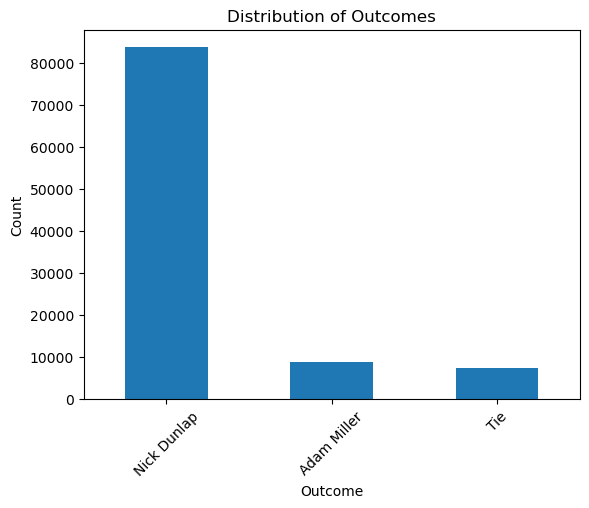

Nick Dunlap vs Alfons Bondesson
Nick Dunlap vs Alfons Bondesson
----------------------------------
        Sim #     Player 1          Player 2                   Course  \
0           1  Nick Dunlap  Alfons Bondesson  Legends Trail Golf Club   
1           2  Nick Dunlap  Alfons Bondesson  Legends Trail Golf Club   
2           3  Nick Dunlap  Alfons Bondesson  Legends Trail Golf Club   
3           4  Nick Dunlap  Alfons Bondesson  Legends Trail Golf Club   
4           5  Nick Dunlap  Alfons Bondesson  Legends Trail Golf Club   
...       ...          ...               ...                      ...   
99995   99996  Nick Dunlap  Alfons Bondesson  Legends Trail Golf Club   
99996   99997  Nick Dunlap  Alfons Bondesson  Legends Trail Golf Club   
99997   99998  Nick Dunlap  Alfons Bondesson  Legends Trail Golf Club   
99998   99999  Nick Dunlap  Alfons Bondesson  Legends Trail Golf Club   
99999  100000  Nick Dunlap  Alfons Bondesson  Legends Trail Golf Club   

                        

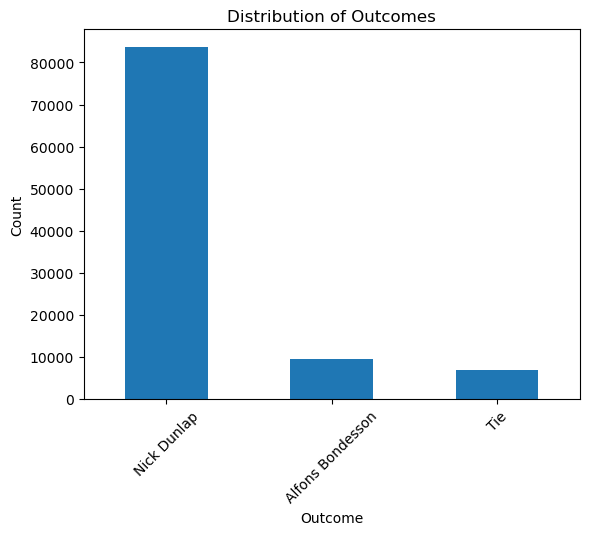

Nick Dunlap vs Brock Snyder
Nick Dunlap vs Brock Snyder
----------------------------------
No data available for Brock Snyder. Simulation cannot proceed.
Nick Dunlap vs Charlie Crockett
Nick Dunlap vs Charlie Crockett
----------------------------------
        Sim #     Player 1          Player 2                   Course  \
0           1  Nick Dunlap  Charlie Crockett  Legends Trail Golf Club   
1           2  Nick Dunlap  Charlie Crockett  Legends Trail Golf Club   
2           3  Nick Dunlap  Charlie Crockett  Legends Trail Golf Club   
3           4  Nick Dunlap  Charlie Crockett  Legends Trail Golf Club   
4           5  Nick Dunlap  Charlie Crockett  Legends Trail Golf Club   
...       ...          ...               ...                      ...   
99995   99996  Nick Dunlap  Charlie Crockett  Legends Trail Golf Club   
99996   99997  Nick Dunlap  Charlie Crockett  Legends Trail Golf Club   
99997   99998  Nick Dunlap  Charlie Crockett  Legends Trail Golf Club   
99998   99999  Ni

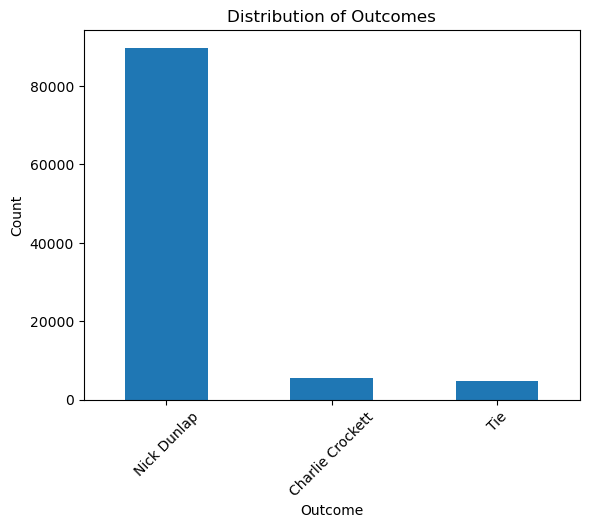

Nick Dunlap vs Dagbjartur Sigurbrandss
Nick Dunlap vs Dagbjartur Sigurbrandss
----------------------------------
        Sim #     Player 1                 Player 2                   Course  \
0           1  Nick Dunlap  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
1           2  Nick Dunlap  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
2           3  Nick Dunlap  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
3           4  Nick Dunlap  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
4           5  Nick Dunlap  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
...       ...          ...                      ...                      ...   
99995   99996  Nick Dunlap  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
99996   99997  Nick Dunlap  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
99997   99998  Nick Dunlap  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
99998   99999  Nick Dunlap  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
99999  

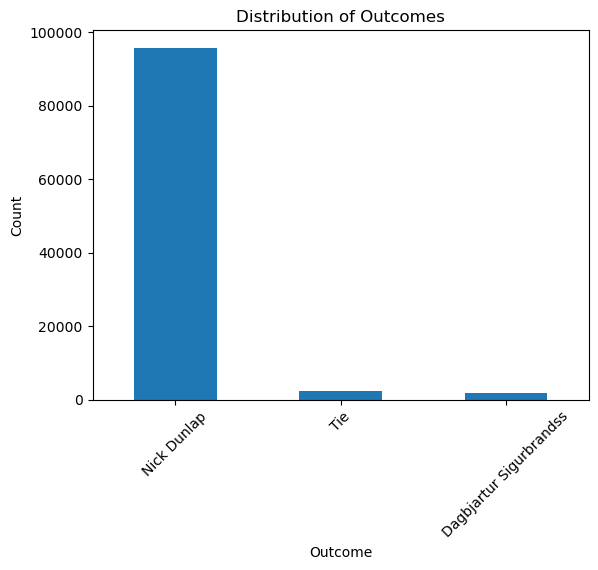

Canon Claycomb vs Adam Miller
Canon Claycomb vs Adam Miller
----------------------------------
        Sim #        Player 1     Player 2                   Course  \
0           1  Canon Claycomb  Adam Miller  Legends Trail Golf Club   
1           2  Canon Claycomb  Adam Miller  Legends Trail Golf Club   
2           3  Canon Claycomb  Adam Miller  Legends Trail Golf Club   
3           4  Canon Claycomb  Adam Miller  Legends Trail Golf Club   
4           5  Canon Claycomb  Adam Miller  Legends Trail Golf Club   
...       ...             ...          ...                      ...   
99995   99996  Canon Claycomb  Adam Miller  Legends Trail Golf Club   
99996   99997  Canon Claycomb  Adam Miller  Legends Trail Golf Club   
99997   99998  Canon Claycomb  Adam Miller  Legends Trail Golf Club   
99998   99999  Canon Claycomb  Adam Miller  Legends Trail Golf Club   
99999  100000  Canon Claycomb  Adam Miller  Legends Trail Golf Club   

                            Matchup  Hole1  Hole2  H

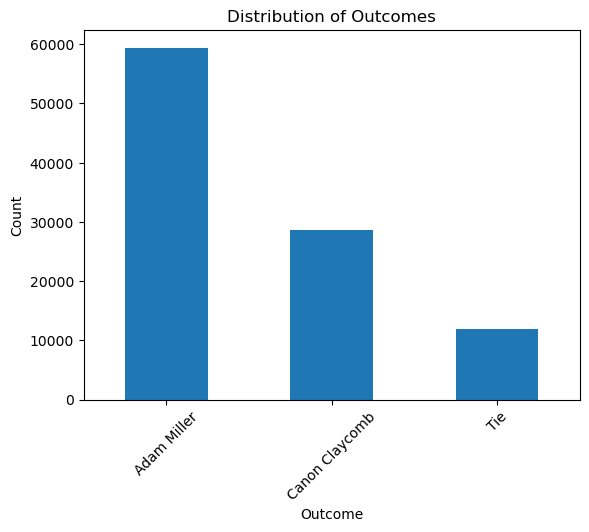

Canon Claycomb vs Alfons Bondesson
Canon Claycomb vs Alfons Bondesson
----------------------------------
        Sim #        Player 1          Player 2                   Course  \
0           1  Canon Claycomb  Alfons Bondesson  Legends Trail Golf Club   
1           2  Canon Claycomb  Alfons Bondesson  Legends Trail Golf Club   
2           3  Canon Claycomb  Alfons Bondesson  Legends Trail Golf Club   
3           4  Canon Claycomb  Alfons Bondesson  Legends Trail Golf Club   
4           5  Canon Claycomb  Alfons Bondesson  Legends Trail Golf Club   
...       ...             ...               ...                      ...   
99995   99996  Canon Claycomb  Alfons Bondesson  Legends Trail Golf Club   
99996   99997  Canon Claycomb  Alfons Bondesson  Legends Trail Golf Club   
99997   99998  Canon Claycomb  Alfons Bondesson  Legends Trail Golf Club   
99998   99999  Canon Claycomb  Alfons Bondesson  Legends Trail Golf Club   
99999  100000  Canon Claycomb  Alfons Bondesson  Legends Tr

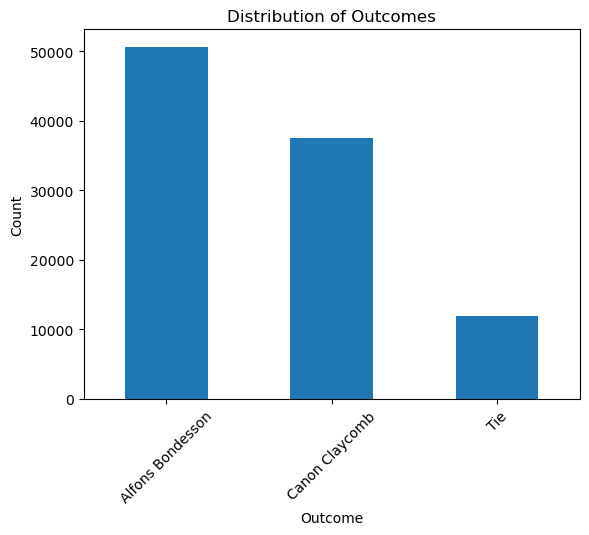

Canon Claycomb vs Brock Snyder
Canon Claycomb vs Brock Snyder
----------------------------------
No data available for Brock Snyder. Simulation cannot proceed.
Canon Claycomb vs Charlie Crockett
Canon Claycomb vs Charlie Crockett
----------------------------------
        Sim #        Player 1          Player 2                   Course  \
0           1  Canon Claycomb  Charlie Crockett  Legends Trail Golf Club   
1           2  Canon Claycomb  Charlie Crockett  Legends Trail Golf Club   
2           3  Canon Claycomb  Charlie Crockett  Legends Trail Golf Club   
3           4  Canon Claycomb  Charlie Crockett  Legends Trail Golf Club   
4           5  Canon Claycomb  Charlie Crockett  Legends Trail Golf Club   
...       ...             ...               ...                      ...   
99995   99996  Canon Claycomb  Charlie Crockett  Legends Trail Golf Club   
99996   99997  Canon Claycomb  Charlie Crockett  Legends Trail Golf Club   
99997   99998  Canon Claycomb  Charlie Crockett  Le

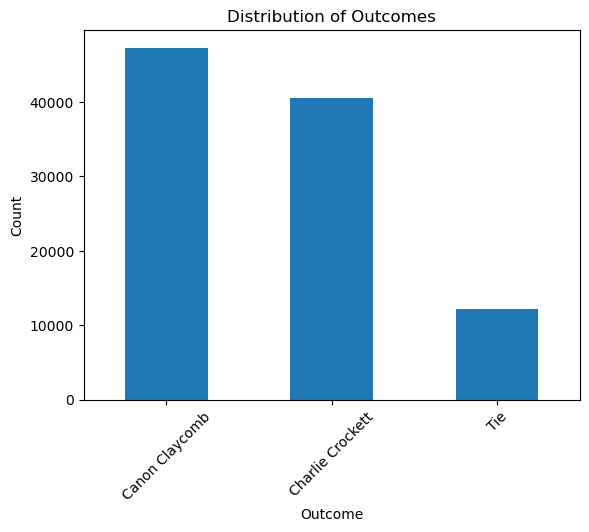

Canon Claycomb vs Dagbjartur Sigurbrandss
Canon Claycomb vs Dagbjartur Sigurbrandss
----------------------------------
        Sim #        Player 1                 Player 2  \
0           1  Canon Claycomb  Dagbjartur Sigurbrandss   
1           2  Canon Claycomb  Dagbjartur Sigurbrandss   
2           3  Canon Claycomb  Dagbjartur Sigurbrandss   
3           4  Canon Claycomb  Dagbjartur Sigurbrandss   
4           5  Canon Claycomb  Dagbjartur Sigurbrandss   
...       ...             ...                      ...   
99995   99996  Canon Claycomb  Dagbjartur Sigurbrandss   
99996   99997  Canon Claycomb  Dagbjartur Sigurbrandss   
99997   99998  Canon Claycomb  Dagbjartur Sigurbrandss   
99998   99999  Canon Claycomb  Dagbjartur Sigurbrandss   
99999  100000  Canon Claycomb  Dagbjartur Sigurbrandss   

                        Course                                   Matchup  \
0      Legends Trail Golf Club  Canon Claycomb_v_Dagbjartur Sigurbrandss   
1      Legends Trail Golf Club  

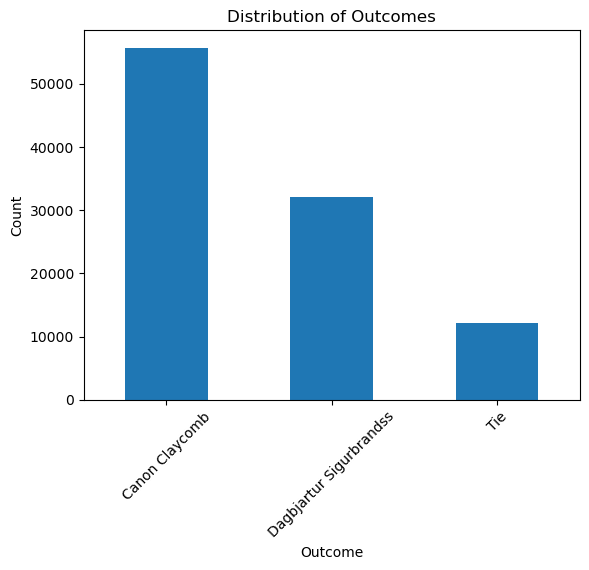

Thomas Ponder vs Adam Miller
Thomas Ponder vs Adam Miller
----------------------------------
        Sim #       Player 1     Player 2                   Course  \
0           1  Thomas Ponder  Adam Miller  Legends Trail Golf Club   
1           2  Thomas Ponder  Adam Miller  Legends Trail Golf Club   
2           3  Thomas Ponder  Adam Miller  Legends Trail Golf Club   
3           4  Thomas Ponder  Adam Miller  Legends Trail Golf Club   
4           5  Thomas Ponder  Adam Miller  Legends Trail Golf Club   
...       ...            ...          ...                      ...   
99995   99996  Thomas Ponder  Adam Miller  Legends Trail Golf Club   
99996   99997  Thomas Ponder  Adam Miller  Legends Trail Golf Club   
99997   99998  Thomas Ponder  Adam Miller  Legends Trail Golf Club   
99998   99999  Thomas Ponder  Adam Miller  Legends Trail Golf Club   
99999  100000  Thomas Ponder  Adam Miller  Legends Trail Golf Club   

                           Matchup  Hole1  Hole2  Hole3  Hole4  Ho

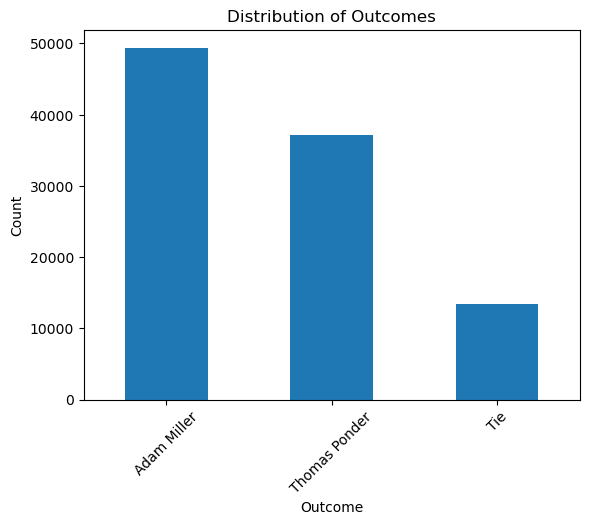

Thomas Ponder vs Alfons Bondesson
Thomas Ponder vs Alfons Bondesson
----------------------------------
        Sim #       Player 1          Player 2                   Course  \
0           1  Thomas Ponder  Alfons Bondesson  Legends Trail Golf Club   
1           2  Thomas Ponder  Alfons Bondesson  Legends Trail Golf Club   
2           3  Thomas Ponder  Alfons Bondesson  Legends Trail Golf Club   
3           4  Thomas Ponder  Alfons Bondesson  Legends Trail Golf Club   
4           5  Thomas Ponder  Alfons Bondesson  Legends Trail Golf Club   
...       ...            ...               ...                      ...   
99995   99996  Thomas Ponder  Alfons Bondesson  Legends Trail Golf Club   
99996   99997  Thomas Ponder  Alfons Bondesson  Legends Trail Golf Club   
99997   99998  Thomas Ponder  Alfons Bondesson  Legends Trail Golf Club   
99998   99999  Thomas Ponder  Alfons Bondesson  Legends Trail Golf Club   
99999  100000  Thomas Ponder  Alfons Bondesson  Legends Trail Golf Club 

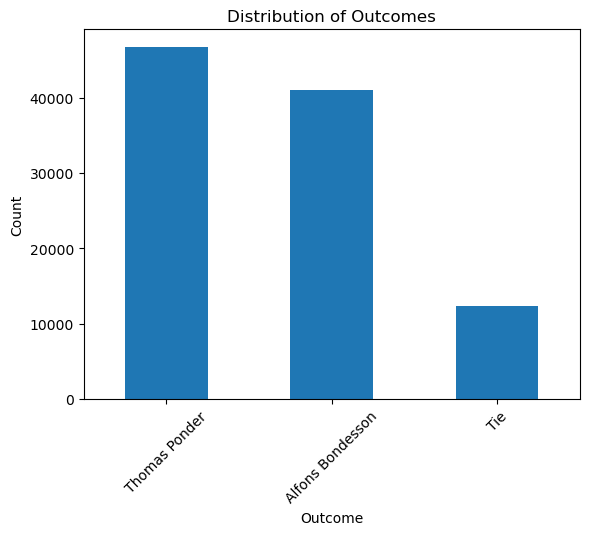

Thomas Ponder vs Brock Snyder
Thomas Ponder vs Brock Snyder
----------------------------------
No data available for Brock Snyder. Simulation cannot proceed.
Thomas Ponder vs Charlie Crockett
Thomas Ponder vs Charlie Crockett
----------------------------------
        Sim #       Player 1          Player 2                   Course  \
0           1  Thomas Ponder  Charlie Crockett  Legends Trail Golf Club   
1           2  Thomas Ponder  Charlie Crockett  Legends Trail Golf Club   
2           3  Thomas Ponder  Charlie Crockett  Legends Trail Golf Club   
3           4  Thomas Ponder  Charlie Crockett  Legends Trail Golf Club   
4           5  Thomas Ponder  Charlie Crockett  Legends Trail Golf Club   
...       ...            ...               ...                      ...   
99995   99996  Thomas Ponder  Charlie Crockett  Legends Trail Golf Club   
99996   99997  Thomas Ponder  Charlie Crockett  Legends Trail Golf Club   
99997   99998  Thomas Ponder  Charlie Crockett  Legends Trail Go

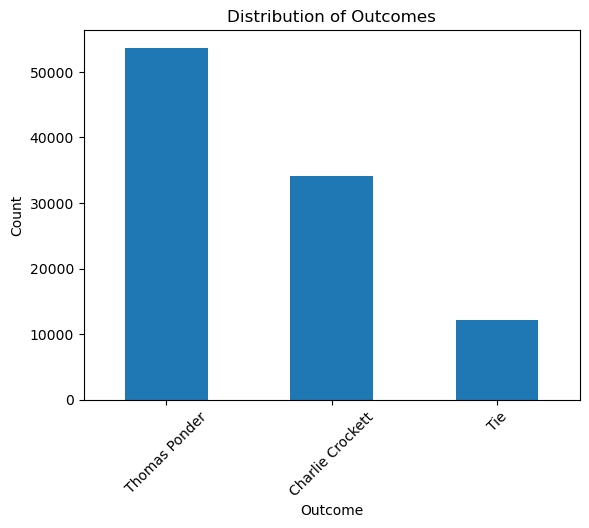

Thomas Ponder vs Dagbjartur Sigurbrandss
Thomas Ponder vs Dagbjartur Sigurbrandss
----------------------------------
        Sim #       Player 1                 Player 2  \
0           1  Thomas Ponder  Dagbjartur Sigurbrandss   
1           2  Thomas Ponder  Dagbjartur Sigurbrandss   
2           3  Thomas Ponder  Dagbjartur Sigurbrandss   
3           4  Thomas Ponder  Dagbjartur Sigurbrandss   
4           5  Thomas Ponder  Dagbjartur Sigurbrandss   
...       ...            ...                      ...   
99995   99996  Thomas Ponder  Dagbjartur Sigurbrandss   
99996   99997  Thomas Ponder  Dagbjartur Sigurbrandss   
99997   99998  Thomas Ponder  Dagbjartur Sigurbrandss   
99998   99999  Thomas Ponder  Dagbjartur Sigurbrandss   
99999  100000  Thomas Ponder  Dagbjartur Sigurbrandss   

                        Course                                  Matchup  \
0      Legends Trail Golf Club  Thomas Ponder_v_Dagbjartur Sigurbrandss   
1      Legends Trail Golf Club  Thomas Ponder_v_

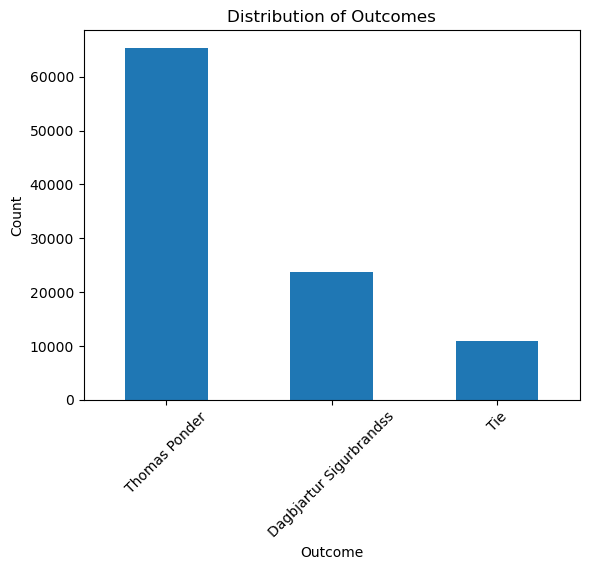

JP Cave vs Adam Miller
JP Cave vs Adam Miller
----------------------------------
        Sim # Player 1     Player 2                   Course  \
0           1  JP Cave  Adam Miller  Legends Trail Golf Club   
1           2  JP Cave  Adam Miller  Legends Trail Golf Club   
2           3  JP Cave  Adam Miller  Legends Trail Golf Club   
3           4  JP Cave  Adam Miller  Legends Trail Golf Club   
4           5  JP Cave  Adam Miller  Legends Trail Golf Club   
...       ...      ...          ...                      ...   
99995   99996  JP Cave  Adam Miller  Legends Trail Golf Club   
99996   99997  JP Cave  Adam Miller  Legends Trail Golf Club   
99997   99998  JP Cave  Adam Miller  Legends Trail Golf Club   
99998   99999  JP Cave  Adam Miller  Legends Trail Golf Club   
99999  100000  JP Cave  Adam Miller  Legends Trail Golf Club   

                     Matchup  Hole1  Hole2  Hole3  Hole4  Hole5  ...  Hole12  \
0      JP Cave_v_Adam Miller      0      0      2      0      1  ...  

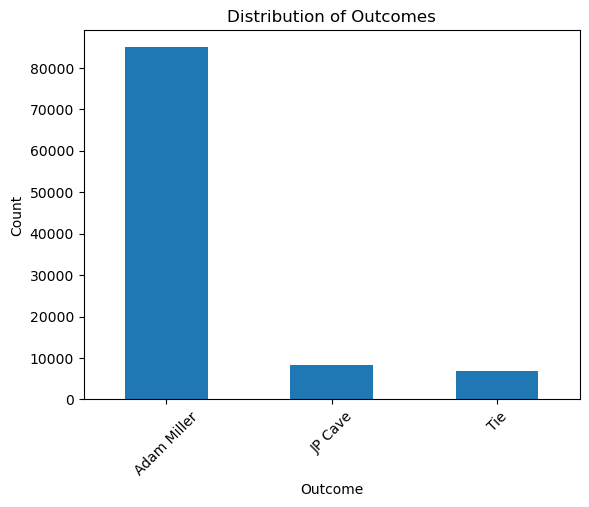

JP Cave vs Alfons Bondesson
JP Cave vs Alfons Bondesson
----------------------------------
        Sim # Player 1          Player 2                   Course  \
0           1  JP Cave  Alfons Bondesson  Legends Trail Golf Club   
1           2  JP Cave  Alfons Bondesson  Legends Trail Golf Club   
2           3  JP Cave  Alfons Bondesson  Legends Trail Golf Club   
3           4  JP Cave  Alfons Bondesson  Legends Trail Golf Club   
4           5  JP Cave  Alfons Bondesson  Legends Trail Golf Club   
...       ...      ...               ...                      ...   
99995   99996  JP Cave  Alfons Bondesson  Legends Trail Golf Club   
99996   99997  JP Cave  Alfons Bondesson  Legends Trail Golf Club   
99997   99998  JP Cave  Alfons Bondesson  Legends Trail Golf Club   
99998   99999  JP Cave  Alfons Bondesson  Legends Trail Golf Club   
99999  100000  JP Cave  Alfons Bondesson  Legends Trail Golf Club   

                          Matchup  Hole1  Hole2  Hole3  Hole4  Hole5  ...  \
0  

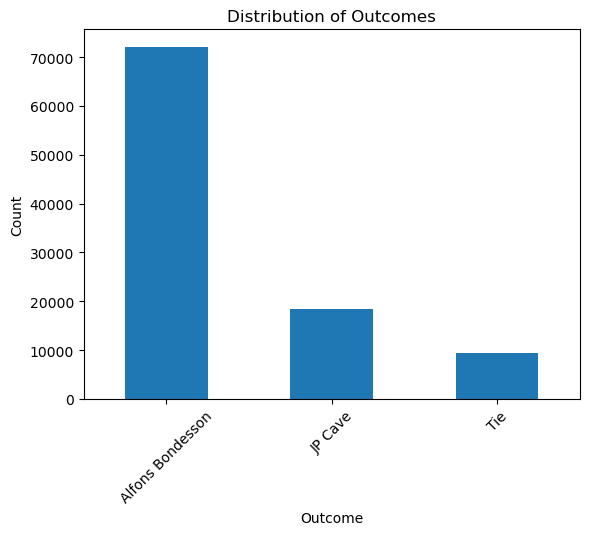

JP Cave vs Brock Snyder
JP Cave vs Brock Snyder
----------------------------------
No data available for Brock Snyder. Simulation cannot proceed.
JP Cave vs Charlie Crockett
JP Cave vs Charlie Crockett
----------------------------------
        Sim # Player 1          Player 2                   Course  \
0           1  JP Cave  Charlie Crockett  Legends Trail Golf Club   
1           2  JP Cave  Charlie Crockett  Legends Trail Golf Club   
2           3  JP Cave  Charlie Crockett  Legends Trail Golf Club   
3           4  JP Cave  Charlie Crockett  Legends Trail Golf Club   
4           5  JP Cave  Charlie Crockett  Legends Trail Golf Club   
...       ...      ...               ...                      ...   
99995   99996  JP Cave  Charlie Crockett  Legends Trail Golf Club   
99996   99997  JP Cave  Charlie Crockett  Legends Trail Golf Club   
99997   99998  JP Cave  Charlie Crockett  Legends Trail Golf Club   
99998   99999  JP Cave  Charlie Crockett  Legends Trail Golf Club   
9999

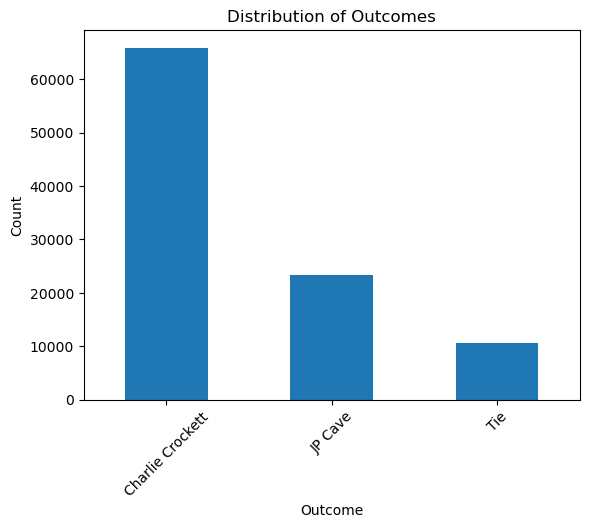

JP Cave vs Dagbjartur Sigurbrandss
JP Cave vs Dagbjartur Sigurbrandss
----------------------------------
        Sim # Player 1                 Player 2                   Course  \
0           1  JP Cave  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
1           2  JP Cave  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
2           3  JP Cave  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
3           4  JP Cave  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
4           5  JP Cave  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
...       ...      ...                      ...                      ...   
99995   99996  JP Cave  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
99996   99997  JP Cave  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
99997   99998  JP Cave  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
99998   99999  JP Cave  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
99999  100000  JP Cave  Dagbjartur Sigurbrandss  Legends Tr

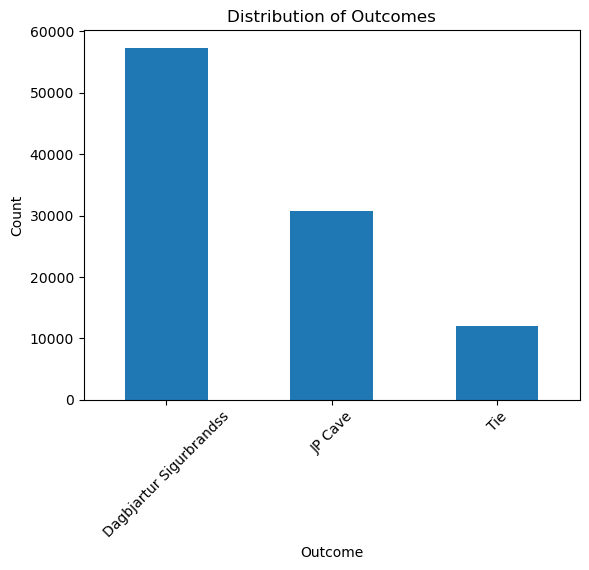

Jones Free vs Adam Miller
Jones Free vs Adam Miller
----------------------------------
        Sim #    Player 1     Player 2                   Course  \
0           1  Jones Free  Adam Miller  Legends Trail Golf Club   
1           2  Jones Free  Adam Miller  Legends Trail Golf Club   
2           3  Jones Free  Adam Miller  Legends Trail Golf Club   
3           4  Jones Free  Adam Miller  Legends Trail Golf Club   
4           5  Jones Free  Adam Miller  Legends Trail Golf Club   
...       ...         ...          ...                      ...   
99995   99996  Jones Free  Adam Miller  Legends Trail Golf Club   
99996   99997  Jones Free  Adam Miller  Legends Trail Golf Club   
99997   99998  Jones Free  Adam Miller  Legends Trail Golf Club   
99998   99999  Jones Free  Adam Miller  Legends Trail Golf Club   
99999  100000  Jones Free  Adam Miller  Legends Trail Golf Club   

                        Matchup  Hole1  Hole2  Hole3  Hole4  Hole5  ...  \
0      Jones Free_v_Adam Miller  

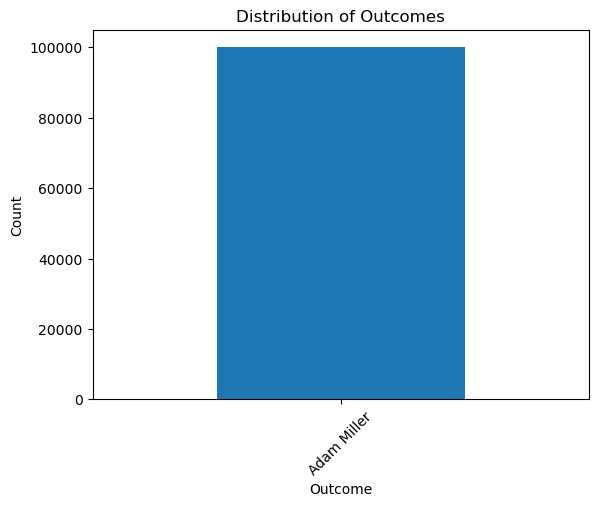

Jones Free vs Alfons Bondesson
Jones Free vs Alfons Bondesson
----------------------------------
        Sim #    Player 1          Player 2                   Course  \
0           1  Jones Free  Alfons Bondesson  Legends Trail Golf Club   
1           2  Jones Free  Alfons Bondesson  Legends Trail Golf Club   
2           3  Jones Free  Alfons Bondesson  Legends Trail Golf Club   
3           4  Jones Free  Alfons Bondesson  Legends Trail Golf Club   
4           5  Jones Free  Alfons Bondesson  Legends Trail Golf Club   
...       ...         ...               ...                      ...   
99995   99996  Jones Free  Alfons Bondesson  Legends Trail Golf Club   
99996   99997  Jones Free  Alfons Bondesson  Legends Trail Golf Club   
99997   99998  Jones Free  Alfons Bondesson  Legends Trail Golf Club   
99998   99999  Jones Free  Alfons Bondesson  Legends Trail Golf Club   
99999  100000  Jones Free  Alfons Bondesson  Legends Trail Golf Club   

                             Matchup  

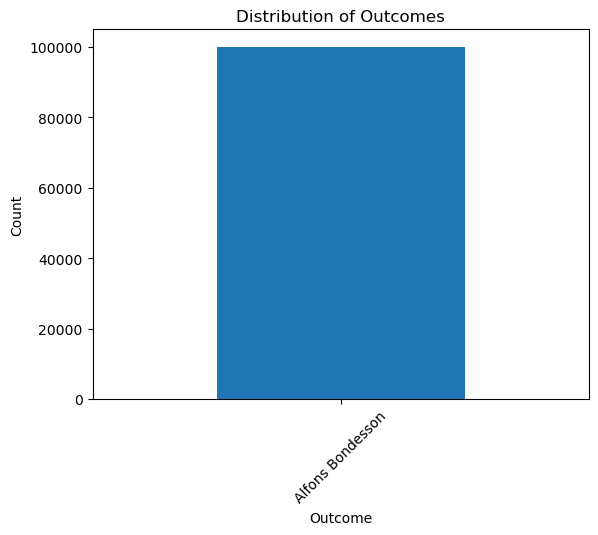

Jones Free vs Brock Snyder
Jones Free vs Brock Snyder
----------------------------------
No data available for Brock Snyder. Simulation cannot proceed.
Jones Free vs Charlie Crockett
Jones Free vs Charlie Crockett
----------------------------------
        Sim #    Player 1          Player 2                   Course  \
0           1  Jones Free  Charlie Crockett  Legends Trail Golf Club   
1           2  Jones Free  Charlie Crockett  Legends Trail Golf Club   
2           3  Jones Free  Charlie Crockett  Legends Trail Golf Club   
3           4  Jones Free  Charlie Crockett  Legends Trail Golf Club   
4           5  Jones Free  Charlie Crockett  Legends Trail Golf Club   
...       ...         ...               ...                      ...   
99995   99996  Jones Free  Charlie Crockett  Legends Trail Golf Club   
99996   99997  Jones Free  Charlie Crockett  Legends Trail Golf Club   
99997   99998  Jones Free  Charlie Crockett  Legends Trail Golf Club   
99998   99999  Jones Free  Char

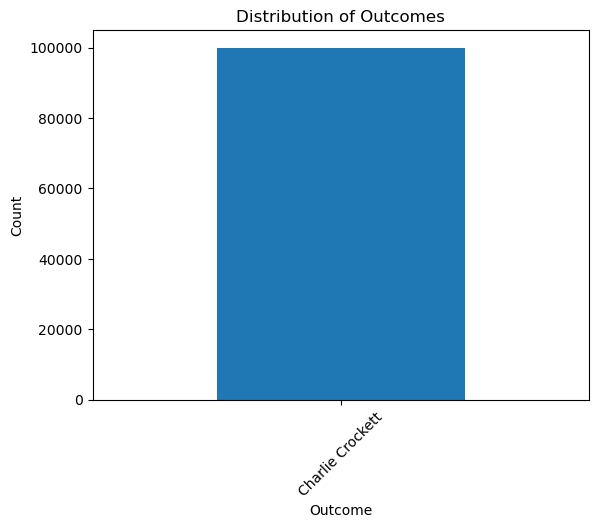

Jones Free vs Dagbjartur Sigurbrandss
Jones Free vs Dagbjartur Sigurbrandss
----------------------------------
        Sim #    Player 1                 Player 2                   Course  \
0           1  Jones Free  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
1           2  Jones Free  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
2           3  Jones Free  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
3           4  Jones Free  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
4           5  Jones Free  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
...       ...         ...                      ...                      ...   
99995   99996  Jones Free  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
99996   99997  Jones Free  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
99997   99998  Jones Free  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
99998   99999  Jones Free  Dagbjartur Sigurbrandss  Legends Trail Golf Club   
99999  100000  Jones

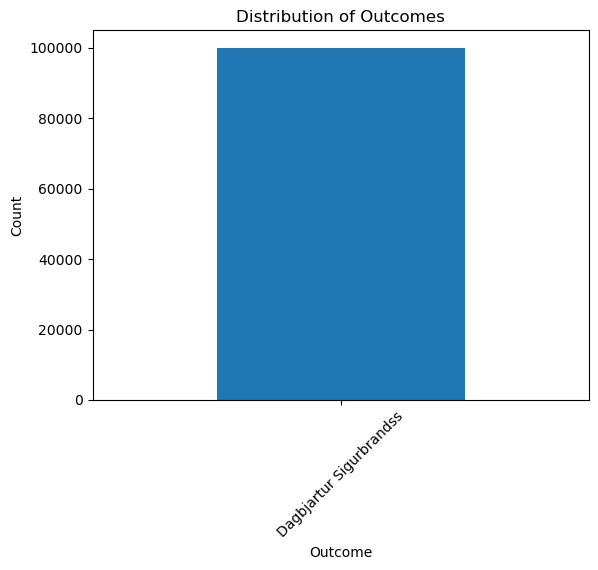

Duration: 0:02:20.385726


In [12]:
#Change Team names and sheet names to correspond to required team sheets
team_1_name = 'Alabama'

team_2_name = 'Mizzou'

course_input = 'Legends Trail Golf Club'

team1_days=['Alabama (9.26.23)','Alabama (10.3.23)','Alabama (10.29.23)','Alabama (2.21.24)','Alabama (3.19.24)']
team2_days=['Mizzou (09.05.23)','Mizzou (9.19.23)','Mizzou (9.26.23)','Mizzou (10.10.23)','Mizzou (10.08.23)']

sims_input = 100000

 



# Open the excel file

xls_file = pd.ExcelFile('C:/Users/vvikranth/OneDrive - The University of Alabama Athletics/Desktop/Mens Golf Datebase.xlsx')

players = pd.read_excel(xls_file, 'Players')
TP_file = pd.read_excel(r'\\ia.ua.edu\department\Strategic Planning\Interns\1. Current Interns\Vishak\Golf\Golf Data\Tournament Par final.xlsx')

teams_database=read_files(xls_file,team1_days,team2_days)
par_info=par_data(TP_file,course_input) 


team_1_lst = players.loc[players['Team'] == team_1_name]

team_1_lst = team_1_lst['Player'].tolist()

team_1_lst = team_1_lst[:5]

print(team_1_lst)

 

team_2_lst = players.loc[players['Team'] == team_2_name]

team_2_lst = team_2_lst['Player'].tolist()

team_2_lst = team_2_lst[:5]

print(team_2_lst)

player_list=team_1_lst+team_2_lst

# for player in player_list:
#     Player_data=simulate(player)
    

# Start time counter

start_time = datetime.now()

final_df=pd.DataFrame()
 

counter = 0

for player_A in team_1_lst:

    for player_B in team_2_lst:

        print(f'{player_A} vs {player_B}')

        final_df=pd.concat([final_df,golf_simulator(player_1_name = player_A, player_2_name = player_B, course_name = course_input, num_of_sims = sims_input,xls=xls_file,TP=TP_file,database=teams_database,par_df=par_info)])

        counter += 1
     
excel_path = r'\\ia.ua.edu\department\Strategic Planning\Interns\1. Current Interns\Vishak\Golf\Golf Data\output_grouped.xlsx'
final_df.to_excel(excel_path, index=True)
# Get time to complete

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

   

#print(counter)